In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
############################# Data Connection #############################
file_path = '/content/drive/MyDrive/Data/HRDataSet.xlsx'
df = pd.read_excel(file_path)

In [ ]:
############################# Data preprocessing step #############################
# explore data
# df.head()
# df.info()

# handle data types
df['EmpID'] = df['EmpID'].astype(str)
df['ID No.'] = df['ID No.'].astype(str)

# handle data formats in Salary Column
df['Salary'] = df['Salary'].astype(str)
df['Salary'] = df['Salary'].str.replace('EGP','')
df['Salary'] = df['Salary'].str.replace(',','')
df['Salary'] = df['Salary'].astype(int)

#remove unnecessary columns
df = df.drop(columns=['Unnamed: 14', 'Unnamed: 15'])

df.head()

,EmpID,Name,ID No.,Dep,Gender,DOB,Age,PayType,Position,Branch,Place of Birth,Hire date,Years no.,Salary
0,52578,Emp 1,29501260170832,Maintenance,Male,1995-01-26,28,Part Time,Manager,Giza,Cairo,2000-02-27,23,21000
1,50880,Emp 2,28411241364134,Logistics,Male,1984-11-24,38,Part Time,Employee,Alexandria,Sharqia,2003-07-10,20,5008
2,57337,Emp 3,29210092190635,Manufacturing,Male,1992-10-09,30,Part Time,Employee,Ismailia,Giza,2012-01-12,11,3009
3,55115,Emp 4,28806191791181,Administration,Female,1988-06-19,35,Full Time,Employee,Giza,Monufia,2001-09-05,22,5313
4,59675,Emp 5,28509210163576,Compliance,Male,1985-09-21,38,Part Time,Employee,Ismailia,Cairo,1998-06-29,25,6194


In [ ]:
############################## Data Analysis #############################
# check which ids should be used for indexing and counting
num_of_unique_EmpId = df['EmpID'].nunique()
print('unique EmpId =', num_of_unique_EmpId , 'out of 1000' )
num_of_unique_ID_No = df['ID No.'].nunique()
print('unique ID No. =', num_of_unique_ID_No , 'out of 1000' )

#study work environment through avg age
avg_age = df['Age'].mean().astype(int)
print("Average Age:", avg_age)

#calculate max salary
avg_salary = df['Salary'].max()
print("Max Salary:", avg_salary)

#calculate avg salary
avg_salary = df['Salary'].mean().astype(int)
print("Average Salary:", avg_salary)

#calculate min salary
avg_salary = df['Salary'].min()
print("Min Salary:", avg_salary)

#count num of employees in each dep
pvt_table = pd.pivot_table(df, values='EmpID', index='Dep', aggfunc='count')

#count num of males vs females employees
malesVsFemales = pd.pivot_table(df, values='EmpID', index='Gender', aggfunc='count')
print(malesVsFemales)

#count num of part time emp vs full time employees
pivot_table = pd.pivot_table(df, values='EmpID', index='PayType', aggfunc='count')
print(pivot_table)

unique EmpId = 948 out of 1000
unique ID No. = 1000 out of 1000
Average Age: 35
Max Salary: 29992
Average Salary: 9326
Min Salary: 3006
        EmpID
Gender       
Female    326
Male      674
           EmpID
PayType         
Full Time    470
Part Time    530


From this quick exploration we found that

- unique EmpId = 948 out of 1000
- unique ID No. = 1000 out of 1000
- Thus we can depend on accessing different employees using Id No.


- Avg Employees' age is 35.
- Max Salary: 29992
- Average Salary: 9326
- Min Salary: 3006
- The number of men is almost twice the number of women.

In [ ]:
year_of_birth = df['DOB'].dt.year

calculated_age = [0] * len(year_of_birth)
for i in range(len(year_of_birth)):
  calculated_age[i] = 2024 - year_of_birth[i]

calculated_age = pd.DataFrame(calculated_age)

#check if the age existed as data is correctly calculated or not
# df[df['Age'] == calculated_age]

# update the wrong data with correct one
df['Age'] = calculated_age

#check if the years of experince existed as data is correctly calculated or not
Hire_year = df['Hire date'].dt.year

yearsOfExperince = [0] *len(Hire_year)
for i in range(len(Hire_year)):
  yearsOfExperince[i] = 2024 - Hire_year[i]

df[df['Years no.'] == yearsOfExperince ]

# update the wrong data with correct one
df['Years no.'] = yearsOfExperince

df.head()

,EmpID,Name,ID No.,Dep,Gender,DOB,Age,PayType,Position,Branch,Place of Birth,Hire date,Years no.,Salary
0,52578,Emp 1,29501260170832,Maintenance,Male,1995-01-26,29,Part Time,Manager,Giza,Cairo,2000-02-27,24,21000
1,50880,Emp 2,28411241364134,Logistics,Male,1984-11-24,40,Part Time,Employee,Alexandria,Sharqia,2003-07-10,21,5008
2,57337,Emp 3,29210092190635,Manufacturing,Male,1992-10-09,32,Part Time,Employee,Ismailia,Giza,2012-01-12,12,3009
3,55115,Emp 4,28806191791181,Administration,Female,1988-06-19,36,Full Time,Employee,Giza,Monufia,2001-09-05,23,5313
4,59675,Emp 5,28509210163576,Compliance,Male,1985-09-21,39,Part Time,Employee,Ismailia,Cairo,1998-06-29,26,6194


Text(0, 0.5, 'Number of Employees')

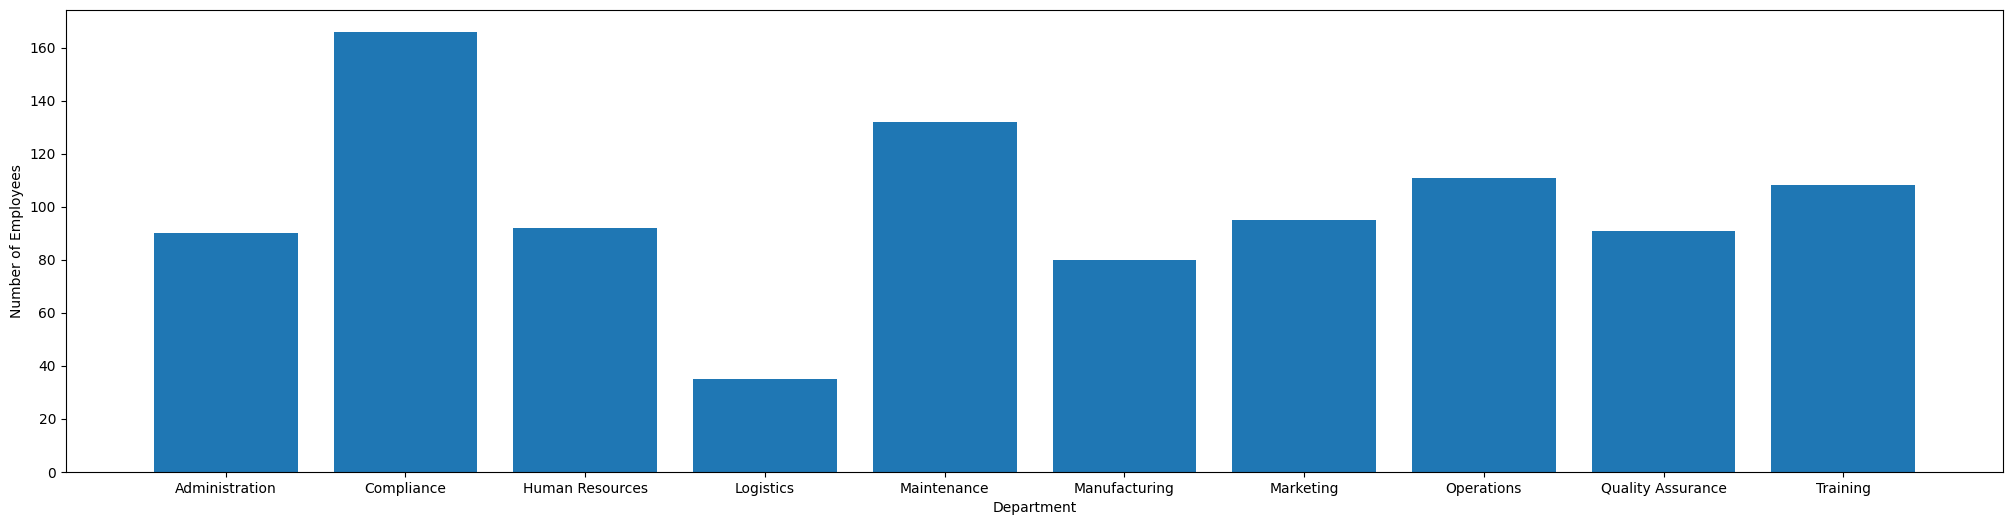

In [ ]:
########################### Data Visualization #############################
plt.figure(figsize=(25, 6))
plt.bar(pvt_table.index, pvt_table['EmpID'])
plt.xlabel('Department')
plt.ylabel('Number of Employees')

This shows the **Compilance** is the department where we have the highest number of mployees on the other hand **Logistics** dep has the lowest number of employees

<Axes: xlabel='Years no.', ylabel='Salary'>

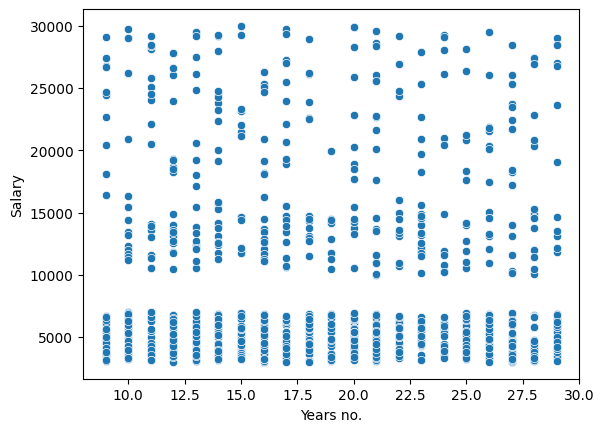

In [ ]:
# Measure correlation between the salary and years of experince
sns.scatterplot(data=df, x='Years no.', y='Salary')